<a href="https://colab.research.google.com/github/i-ganza007/Multimodal-Data-Preprocessing/blob/main/notebooks/Sound_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import librosa as lb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
y_confirm_eddy , sr_confirm_eddy = lb.load('/content/confirm_eddy.mp3')
y_confirm_lievin , sr_confirm_lievin = lb.load('/content/confirm_lievin.mp3')
y_approve_eddy , sr_approve_eddy = lb.load('/content/yes_approve_eddy.mp3')
y_approve_lievin , sr_approve_lievin = lb.load('/content/yes_approve_lievin.mp3')

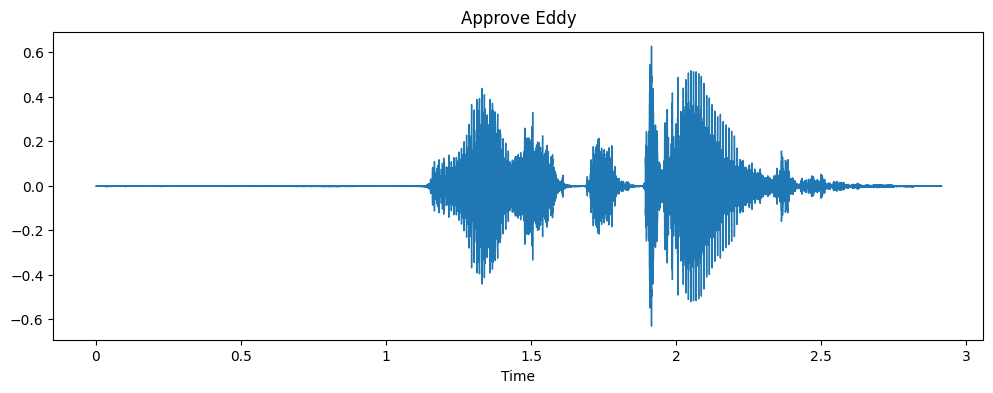

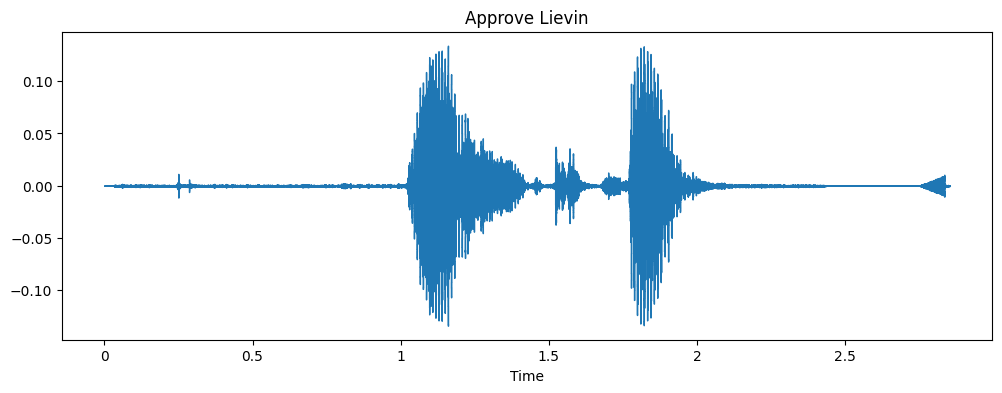

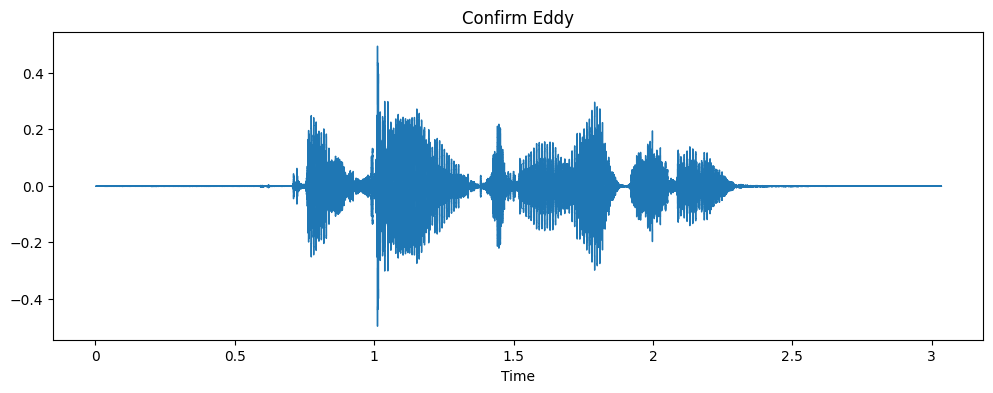

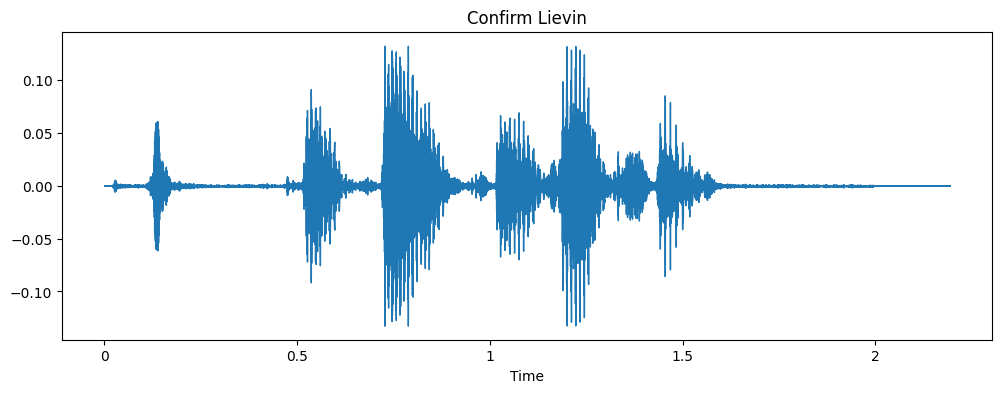

In [33]:
y_confirm_eddy_sr =  sr_confirm_eddy
y_confirm_lievin_sr = sr_confirm_lievin
y_approve_eddy_sr = sr_approve_eddy
y_approve_lievin_sr = sr_approve_lievin
waveforms = {
    'Approve Eddy': (y_approve_eddy, y_approve_eddy_sr),
    'Approve Lievin': (y_approve_lievin, y_approve_lievin_sr),
    'Confirm Eddy': (y_confirm_eddy, y_confirm_eddy_sr),
    'Confirm Lievin': (y_confirm_lievin, y_confirm_lievin_sr)
}

# Loop through the waveforms and generate the plots
for title, (y, sr) in waveforms.items():
    plt.figure(figsize=(12, 4))
    lb.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.show()

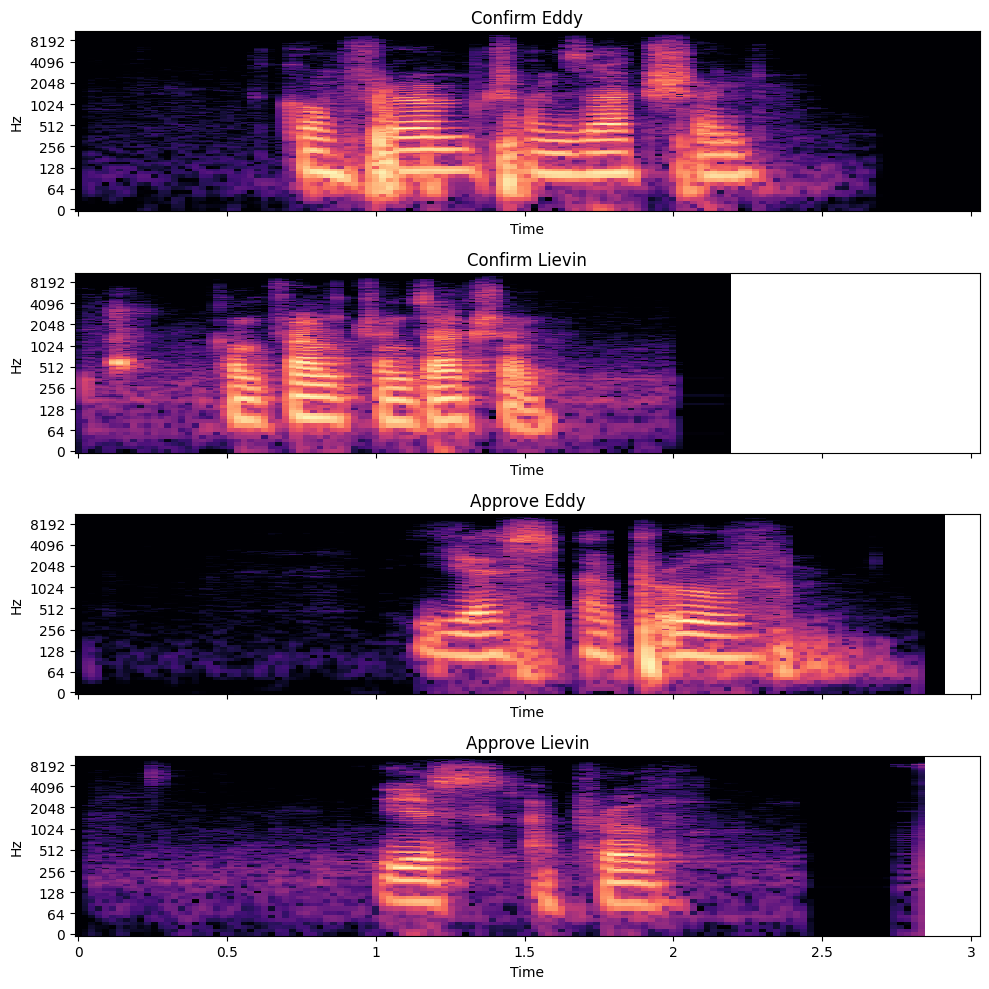

In [34]:
D_confirm_eddy = lb.stft(y_confirm_eddy)
D_confirm_lievin = lb.stft(y_confirm_lievin)
D_approve_eddy = lb.stft(y_approve_eddy)
D_approve_lievin = lb.stft(y_approve_lievin)
fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(10, 10))

lb.display.specshow(lb.amplitude_to_db(np.abs(D_confirm_eddy), ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Confirm Eddy')

lb.display.specshow(lb.amplitude_to_db(np.abs(D_confirm_lievin), ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Confirm Lievin')

lb.display.specshow(lb.amplitude_to_db(np.abs(D_approve_eddy), ref=np.max),y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Approve Eddy')

lb.display.specshow(lb.amplitude_to_db(np.abs(D_approve_lievin), ref=np.max),y_axis='log', x_axis='time', ax=ax[3])
ax[3].set(title='Approve Lievin')

plt.tight_layout()
plt.show()

In [35]:
# Trimming the audio to remove the silence
yt_confirm_eddy , index_confirm_eddy = lb.effects.trim(y_confirm_eddy)
yt_confirm_lievin , index_confirm_lievin = lb.effects.trim(y_confirm_lievin)
yt_approve_eddy , index_approve_eddy = lb.effects.trim(y_approve_eddy)
yt_approve_lievin , index_approve_lievin = lb.effects.trim(y_approve_lievin)
print(lb.get_duration(y=yt_confirm_eddy, sr=sr_confirm_eddy))
print(lb.get_duration(y=yt_confirm_lievin, sr=sr_confirm_lievin))
print(lb.get_duration(y=yt_approve_eddy, sr=sr_approve_eddy))
print(lb.get_duration(y=yt_approve_lievin, sr=sr_approve_lievin))
print('Before')
print(lb.get_duration(y=y_confirm_eddy, sr=sr_confirm_eddy))
print(lb.get_duration(y=y_confirm_lievin, sr=sr_approve_lievin))
print(lb.get_duration(y=y_approve_eddy, sr=sr_approve_eddy))
print(lb.get_duration(y=y_approve_lievin, sr=sr_confirm_lievin))

2.670294784580499
2.043356009070295
2.8792743764172335
2.8535147392290248
Before
3.033514739229025
2.193514739229025
2.913514739229025
2.8535147392290248


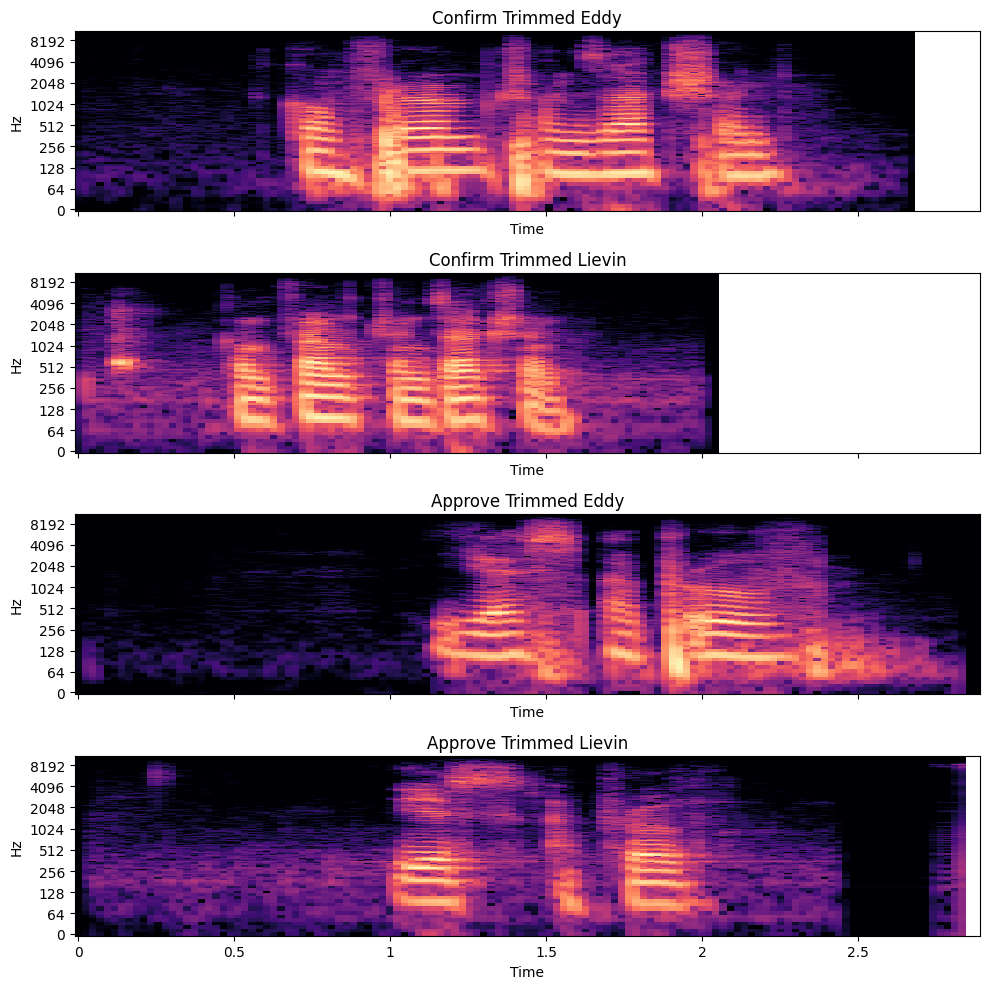

In [36]:
# Trimmed Spectograms
Dt_confirm_eddy = lb.stft(yt_confirm_eddy)
Dt_confirm_lievin = lb.stft(yt_confirm_lievin)
Dt_approve_eddy = lb.stft(yt_approve_eddy)
Dt_approve_lievin = lb.stft(yt_approve_lievin)
fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(10, 10))

lb.display.specshow(lb.amplitude_to_db(np.abs(Dt_confirm_eddy), ref=np.max),y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Confirm Trimmed Eddy')

lb.display.specshow(lb.amplitude_to_db(np.abs(Dt_confirm_lievin), ref=np.max),y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Confirm Trimmed Lievin')

lb.display.specshow(lb.amplitude_to_db(np.abs(Dt_approve_eddy), ref=np.max),y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Approve Trimmed Eddy')

lb.display.specshow(lb.amplitude_to_db(np.abs(Dt_approve_lievin), ref=np.max),y_axis='log', x_axis='time', ax=ax[3])
ax[3].set(title='Approve Trimmed Lievin')

plt.tight_layout()
plt.show()

In [37]:
# Augmentation Pitch Shift
y_pitch_shift_confirm_eddy = lb.effects.pitch_shift(yt_confirm_eddy, sr=sr_confirm_eddy, n_steps=4)
y_pitch_shift_confirm_lievin = lb.effects.pitch_shift(yt_confirm_lievin,sr=sr_confirm_lievin, n_steps=4)
y_pitch_shift_approve_eddy = lb.effects.pitch_shift(yt_approve_eddy, sr=sr_approve_eddy, n_steps=4)
y_pitch_shift_approve_lievin = lb.effects.pitch_shift(yt_approve_lievin, sr=sr_approve_lievin, n_steps=4)


In [38]:
# Time Stretch
y_trimmed_stretched_confirm_eddy = lb.effects.time_stretch(yt_confirm_eddy, rate=0.8)
y_trimmed_stretched_confirm_lievin = lb.effects.time_stretch(yt_confirm_lievin, rate=0.8)
y_trimmed_stretched_approve_eddy = lb.effects.time_stretch(yt_approve_eddy, rate=0.8)
y_trimmed_stretched_approve_lievin = lb.effects.time_stretch(yt_approve_lievin, rate=0.8)

In [39]:
#Noisy data
# Confirm Eddy
noise_confirm_eddy = np.random.randn(len(yt_confirm_eddy))
y_trimmed_noisy_confirm_eddy = yt_confirm_eddy + 0.005 * noise_confirm_eddy
y_trimmed_noisy_confirm_eddy = np.clip(y_trimmed_noisy_confirm_eddy, -1.0, 1.0)

# Confirm Lievin
noise_confirm_lievin = np.random.randn(len(yt_confirm_lievin))
y_trimmed_noisy_confirm_lievin = yt_confirm_lievin + 0.005 * noise_confirm_lievin
y_trimmed_noisy_confirm_lievin = np.clip(y_trimmed_noisy_confirm_lievin, -1.0, 1.0)

# Approve Eddy
noise_approve_eddy = np.random.randn(len(yt_approve_eddy))
y_trimmed_noisy_approve_eddy = yt_approve_eddy + 0.005 * noise_approve_eddy
y_trimmed_noisy_approve_eddy = np.clip(y_trimmed_noisy_approve_eddy, -1.0, 1.0)

# Approve Lievin
noise_approve_lievin = np.random.randn(len(yt_approve_lievin))
y_trimmed_noisy_approve_lievin = yt_approve_lievin + 0.005 * noise_approve_lievin
y_trimmed_noisy_approve_lievin = np.clip(y_trimmed_noisy_approve_lievin, -1.0, 1.0)



In [40]:
augmentations = {
    'pitch_confirm_eddy': (y_pitch_shift_confirm_eddy, sr_confirm_eddy),
    'pitch_confirm_lievin': (y_pitch_shift_lievin, sr_confirm_lievin),
    'pitch_approve_eddy': (y_pitch_shift_eddy, sr_approve_eddy),
    'pitch_approve_lievin': (y_pitch_shift_lievin, sr_approve_lievin),

    'stretch_confirm_eddy': (y_trimmed_stretched_confirm_eddy, sr_confirm_eddy),
    'stretch_confirm_lievin': (y_trimmed_stretched_confirm_lievin, sr_confirm_lievin),
    'stretch_approve_eddy': (y_trimmed_stretched_approve_eddy, sr_approve_eddy),
    'stretch_approve_lievin': (y_trimmed_stretched_approve_lievin, sr_approve_lievin),

    'noise_confirm_eddy': (y_trimmed_noisy_confirm_eddy, sr_confirm_eddy),
    'noise_confirm_lievin': (y_trimmed_noisy_confirm_lievin, sr_confirm_lievin),
    'noise_approve_eddy': (y_trimmed_noisy_approve_eddy, sr_approve_eddy),
    'noise_approve_lievin': (y_trimmed_noisy_approve_lievin, sr_approve_lievin)
}


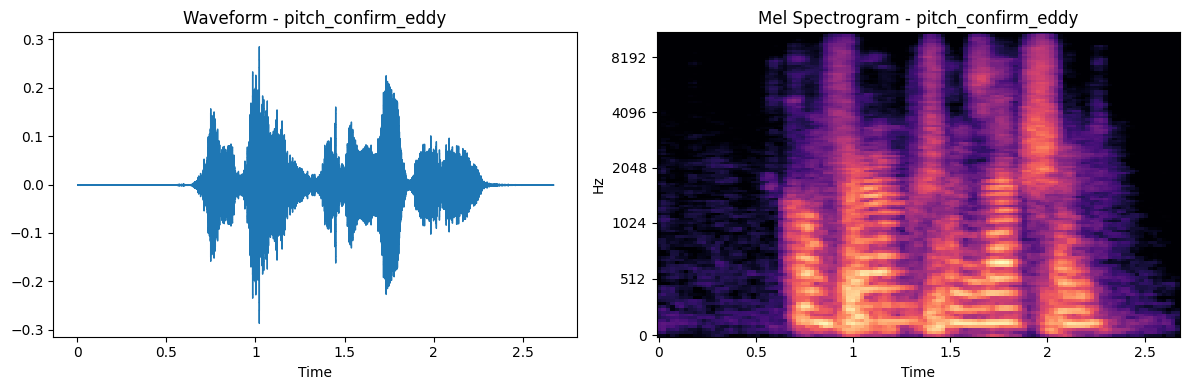

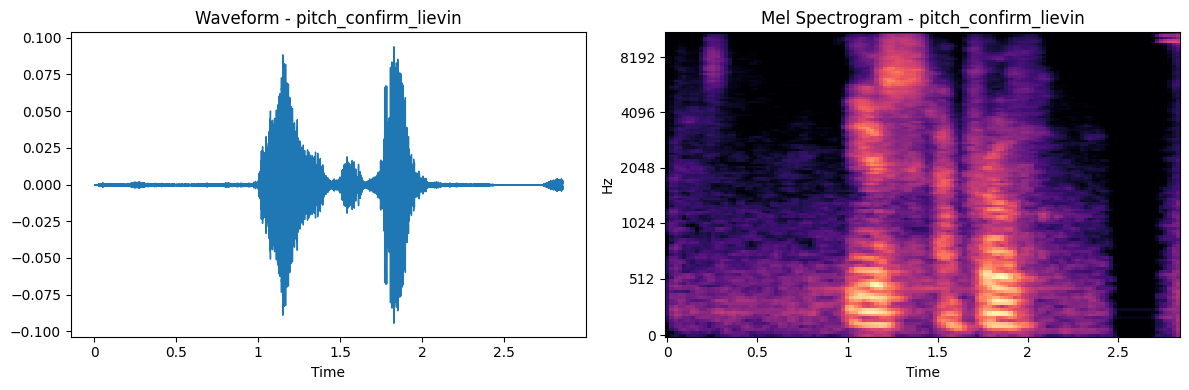

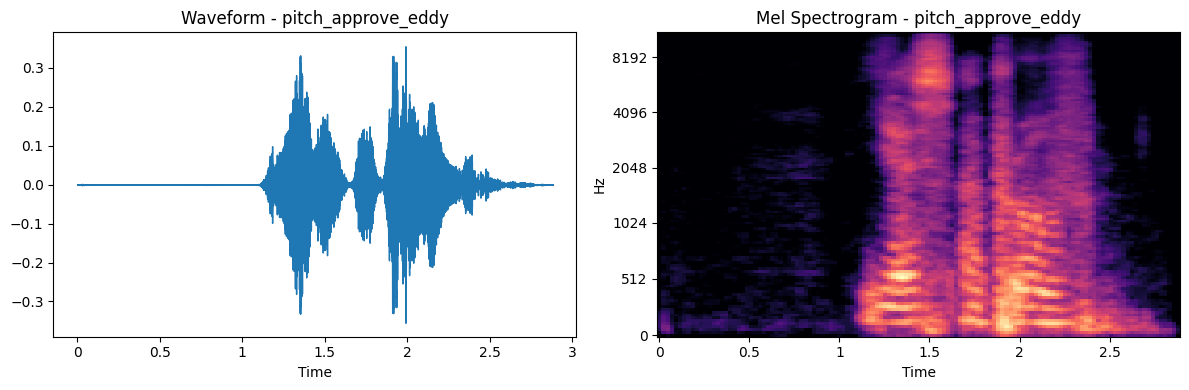

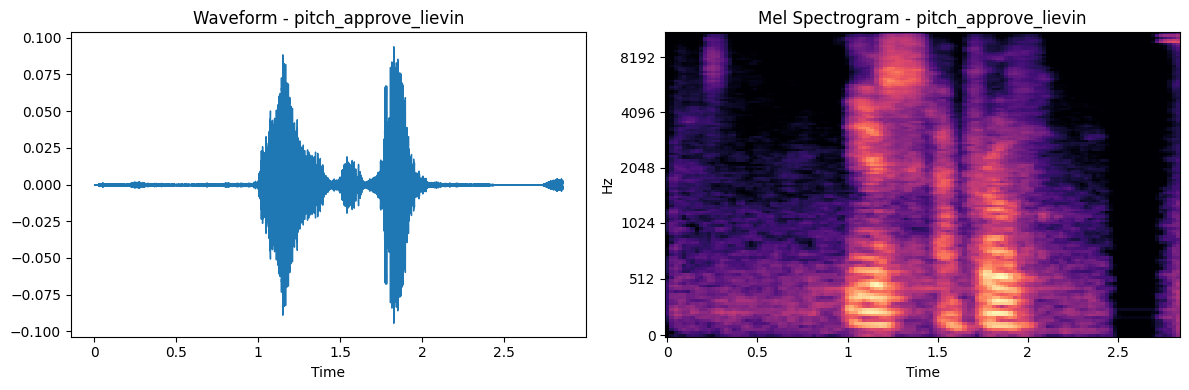

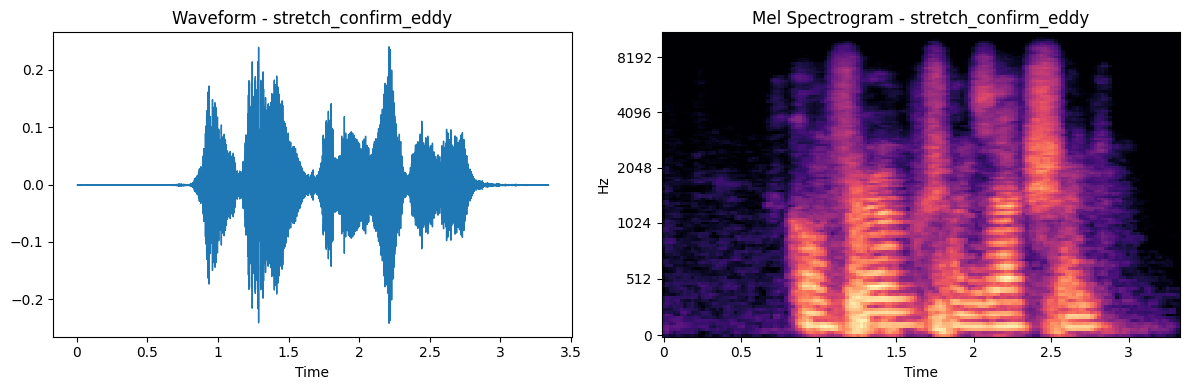

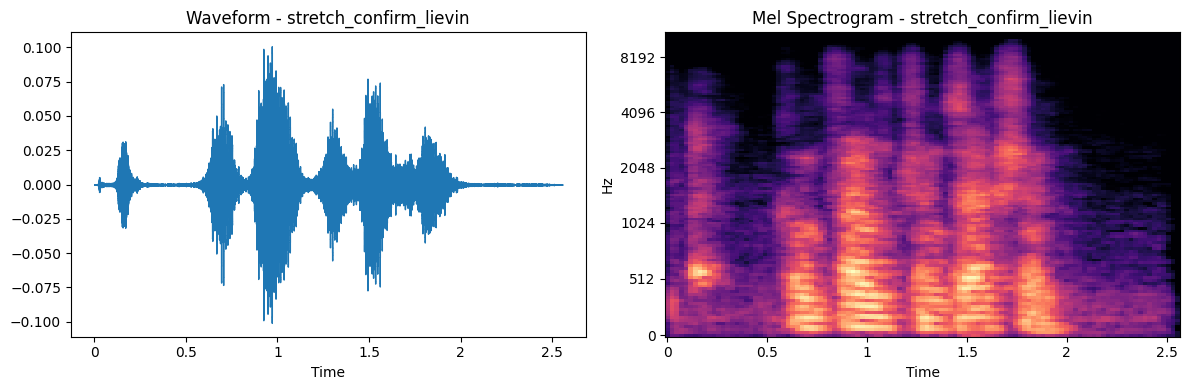

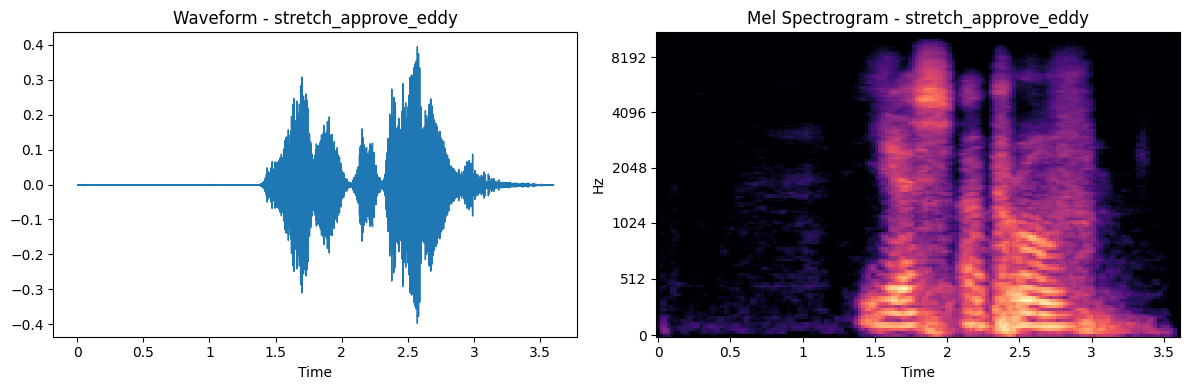

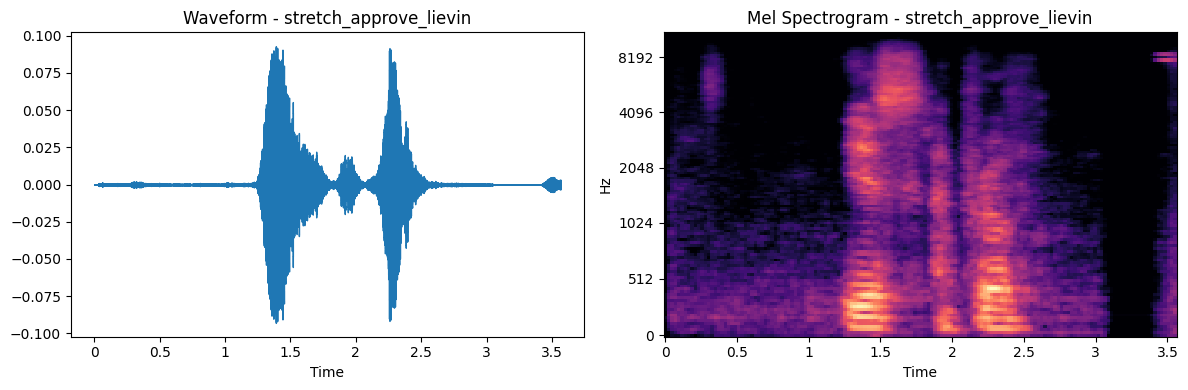

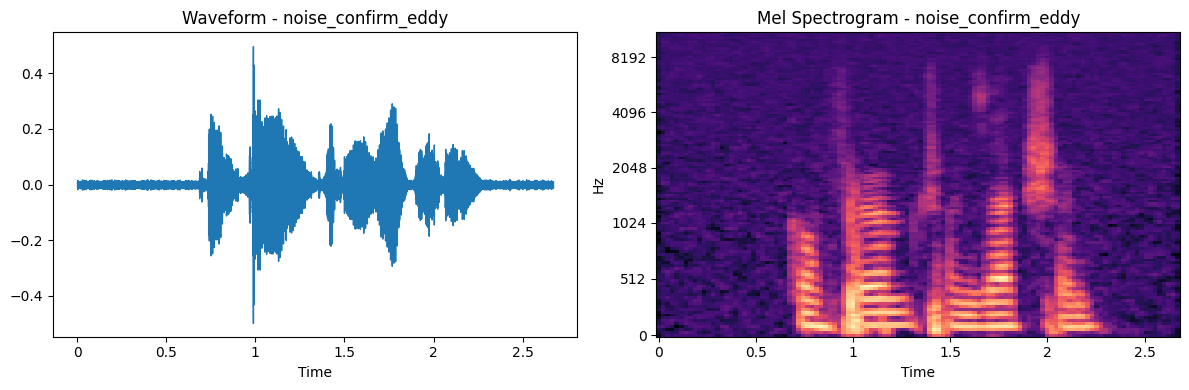

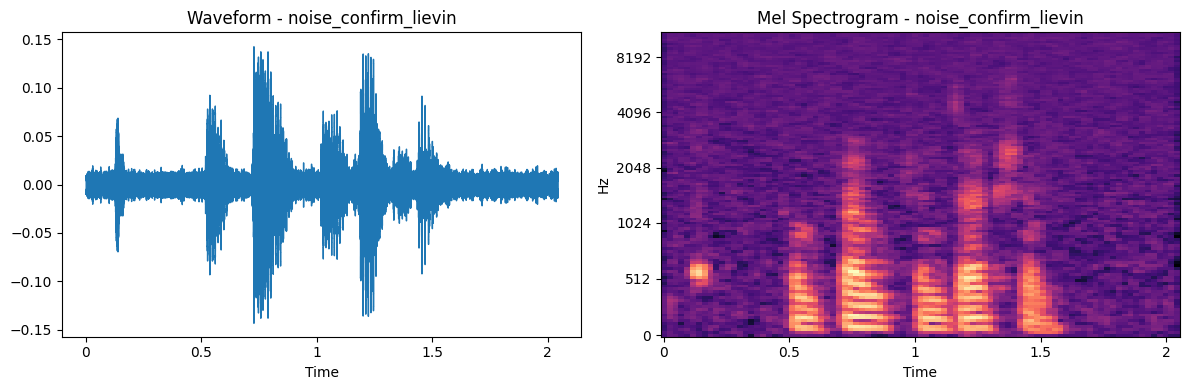

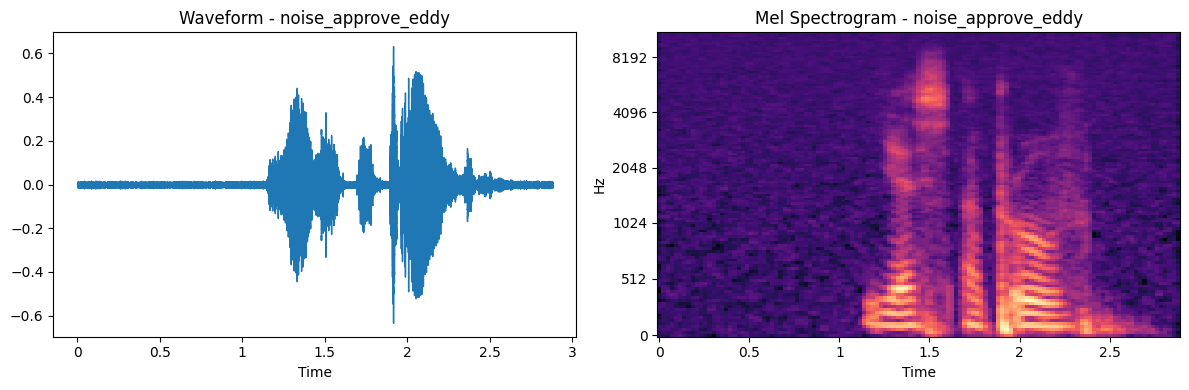

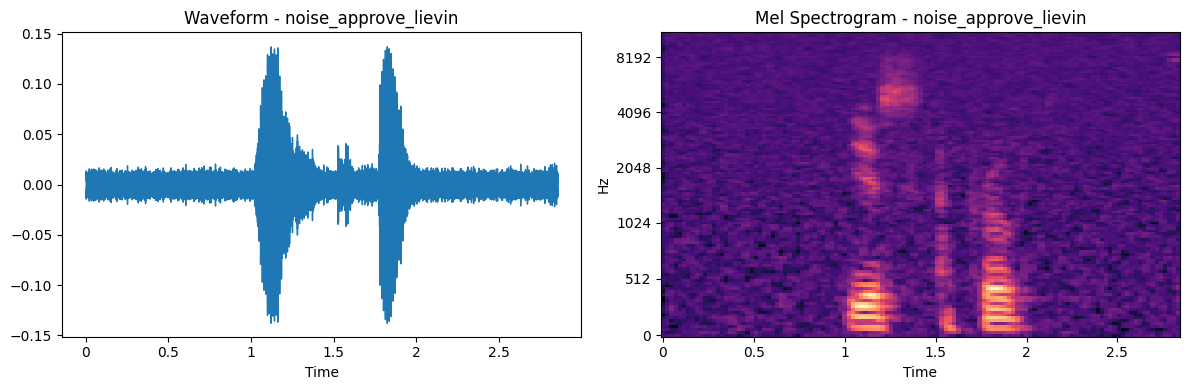

In [41]:

for label, (y, sr) in augmentations.items():
    plt.figure(figsize=(12, 4))

    # Waveform
    plt.subplot(1, 2, 1)
    lb.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {label}")

    # Spectrogram
    plt.subplot(1, 2, 2)
    S = lb.feature.melspectrogram(y=y, sr=sr)
    lb.display.specshow(lb.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.title(f"Mel Spectrogram - {label}")

    plt.tight_layout()
    plt.show()


In [42]:
def extract_features(y, sr):
    # MFCC
    mfcc = lb.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

    # Delta and Delta-Delta MFCC
    mfcc_delta = lb.feature.delta(mfcc)
    mfcc_delta2 = lb.feature.delta(mfcc, order=2)
    mfcc_delta_mean = np.mean(mfcc_delta, axis=1)
    mfcc_delta2_mean = np.mean(mfcc_delta2, axis=1)

    # Spectral features
    rolloff = lb.feature.spectral_rolloff(y=y, sr=sr)
    centroid = lb.feature.spectral_centroid(y=y, sr=sr)
    bandwidth = lb.feature.spectral_bandwidth(y=y, sr=sr)
    contrast = lb.feature.spectral_contrast(y=y, sr=sr)
    flatness = lb.feature.spectral_flatness(y=y)

    # Energy and rhythm features
    rms = lb.feature.rms(y=y)
    zcr = lb.feature.zero_crossing_rate(y)

    # Fundamental frequency
    f0 = lb.yin(y, fmin=50, fmax=400)
    f0_clean = f0[f0 > 0]

    # Formant-like  LPC
    lpc_coeffs = lb.lpc(y, order=12)

    features = {
        'duration': lb.get_duration(y=y, sr=sr),

        **{f'mfcc_{i}_mean': mfcc_mean[i] for i in range(13)},
        **{f'mfcc_{i}_std': mfcc_std[i] for i in range(13)},

        **{f'mfcc_delta_{i}_mean': mfcc_delta_mean[i] for i in range(13)},
        **{f'mfcc_delta2_{i}_mean': mfcc_delta2_mean[i] for i in range(13)},

        'rolloff_mean': np.mean(rolloff),
        'rolloff_std': np.std(rolloff),
        'centroid_mean': np.mean(centroid),
        'centroid_std': np.std(centroid),
        'bandwidth_mean': np.mean(bandwidth),
        'bandwidth_std': np.std(bandwidth),
        'contrast_mean': np.mean(contrast),
        'contrast_std': np.std(contrast),
        'flatness_mean': np.mean(flatness),
        'flatness_std': np.std(flatness),

        # Energy features
        'rms_mean': np.mean(rms),
        'rms_std': np.std(rms),
        'zcr_mean': np.mean(zcr),
        'zcr_std': np.std(zcr),

        # Pitch features
        'f0_mean': np.mean(f0_clean) if len(f0_clean) > 0 else 0,
        'f0_std': np.std(f0_clean) if len(f0_clean) > 0 else 0,
        'f0_min': np.min(f0_clean) if len(f0_clean) > 0 else 0,
        'f0_max': np.max(f0_clean) if len(f0_clean) > 0 else 0,

        # LPC coefficients
        **{f'lpc_{i}': lpc_coeffs[i] for i in range(min(12, len(lpc_coeffs)))},
    }

    return features

In [43]:
features_confirm_eddy = extract_features(yt_confirm_eddy, sr_confirm_eddy)
features_confirm_lievin = extract_features(yt_confirm_lievin, sr_confirm_lievin)
features_approve_eddy = extract_features(yt_approve_eddy, sr_approve_eddy)
features_approve_lievin = extract_features(yt_approve_lievin, sr_approve_lievin)

In [49]:
all_features = []
labels = ['confirm-transaction_eddy', 'confirm-transaction_lievin', 'yes-approve_eddy', 'yes-approve_lievin']
feature_sets = [features_confirm_eddy, features_confirm_lievin, features_approve_eddy, features_approve_lievin]

for label, features in zip(labels, feature_sets):
    row = {'file': label, 'speaker': label.split('_')[1], 'command': label.split('_')[0].replace('-', ' ')}
    row.update(features)
    all_features.append(row)

df = pd.DataFrame(all_features)
df.to_csv('audio_features.csv', index=False)
